[This notebook's content is based on here.](http://kogolab.chillout.jp/elearn/hamburger/chap3/sec1.html)

In [2]:
using PyCall
using PyPlot
using Distributions
@pyimport seaborn as sns
sns.set_style("whitegrid")
sns.set_style(Dict("grid.linestyle" => "--"))

| お店/メニュ | ポテト  | チキン | 合計|
|-------------|---------|--------|-----|
| ワクワク | 435 | 165 | 600|
| もぐもぐ | 265  | 135| 400|
| 合計 | 700  | 300| 1000|

ワクワクバーガーでのフライドチキンが，もぐもぐバーガーのチキンに比べて売れていないか否かを調べる．

**帰無仮説: チキンとポテトの売り上げの割合に関して、モグモグとワクワクの間に差はない**

両店舗でポテトとチキンが同じ割合で売れるとした時の個数を計算する

| お店/メニュ | ポテト  | チキン | 合計|
|-------------|---------|--------|-----|
| ワクワク | 420 | 180 | 600|
| もぐもぐ | 280  | 120| 400|
| 合計 | 700  | 300| 1000|
これは帰無仮説が成立した場合に期待される度数なのでこれを**期待度数**という

もとのデータである下表の各値は**観測度数**

| お店/メニュ | ポテト  | チキン | 合計|
|-------------|---------|--------|-----|
| ワクワク | 435 | 165 | 600|
| もぐもぐ | 265  | 135| 400|
| 合計 | 700  | 300| 1000|

2つのテーブルを比較するとわかること
* ワクワクではポテトの観測度数 > 期待度数 チキン観測度数 < 期待度数
* もぐもぐでは逆にポテトの観測度数 < 期待度数 チキン観測度数 > 期待度数

両者ともに観測度数は期待度数からずれている，このズレを定量的に評価する．

ズレの評価値として以下のものを考える

(観測度数 - 期待度数)^2の総和

しかしこれでは観測度数，期待度数を定数倍した際にその分だけズレを不当に大きく評価してしまうことになる．
そこで
$$
\chi^2 = \sum \frac{(\text{観測度数} - \text{期待度数})^2}{期待度数}
$$

この式から
* 期待値と観測度数が完全に一致すればカイ二乗値はゼロ
* 逆にズレが大きくなればなるほどカイ二乗値も大きくなる
事がわかる

実際に計算してみると

In [3]:
observed = [435 165; 265 135]
expected = [420 180; 280 120]

2x2 Array{Int64,2}:
 420  180
 280  120

In [4]:
(observed - expected).^2

2x2 Array{Int64,2}:
 225  225
 225  225

In [5]:
χ(observed, expected) = sum((observed - expected).^2 ./ expected)

χ (generic function with 1 method)

In [6]:
χ(observed, expected)

4.464285714285714

## $\chi^2 分布について$

### ピンポン球実験
白とオレンジのピンポン球が50個ずつ，そこから10個無作為に取り出す思考を考える．

この場合，期待度数は白球5個とオレンジ球5個である．

In [13]:
expected = [5, 5];

In [22]:
?Binomial

search: Binomial binomial PoissonBinomial NegativeBinomial BetaBinomial



```
Binomial(n,p)
```

A *Binomial distribution* characterizes the number of successes in a sequence of independent trials. It has two parameters: `n`, the number of trials, and `p`, the probability of success in an individual trial, with the distribution:

$P(X = k) = {n \choose k}p^k(1-p)^{n-k},  \quad \text{ for } k = 0,1,2, \ldots, n.$
```julia
Binomial()      # Binomial distribution with n = 1 and p = 0.5
Binomial(n)     # Binomial distribution for n trials with success rate p = 0.5
Binomial(n, p)  # Binomial distribution for n trials with success rate p

params(d)       # Get the parameters, i.e. (n, p)
ntrials(d)      # Get the number of trials, i.e. n
succprob(d)     # Get the success rate, i.e. p
failprob(d)     # Get the failure rate, i.e. 1 - p
```

External links:

  * [Binomial distribution on Wikipedia](http://en.wikipedia.org/wiki/Binomial_distribution)


In [34]:
binom_dist = Binomial(10, 1/2)

Distributions.Binomial(n=10, p=0.5)

In [35]:
binom_pdf = pdf(binom_dist)

11-element Array{Float64,1}:
 0.000976563
 0.00976563 
 0.0439453  
 0.117188   
 0.205078   
 0.246094   
 0.205078   
 0.117188   
 0.0439453  
 0.00976563 
 0.000976563

In [42]:
χs = []
probs = []
obserbed = [5, 5]
println(χ(obserbed, expected), pdf(binom_dist, 5))
push!(χs, χ(obserbed, expected))
push!(probs, pdf(binom_dist, 5))
obserbed = [6, 4]
println(χ(obserbed, expected), pdf(binom_dist, 6))
push!(χs, χ(obserbed, expected))
push!(probs, pdf(binom_dist, 6))
obserbed = [7, 3]
println(χ(obserbed, expected), pdf(binom_dist, 7))
push!(χs, χ(obserbed, expected))
push!(probs, pdf(binom_dist, 7))
obserbed = [8, 2]
println(χ(obserbed, expected), pdf(binom_dist, 8))
push!(χs, χ(obserbed, expected))
push!(probs, pdf(binom_dist, 8))
obserbed = [9, 1]
println(χ(obserbed, expected), pdf(binom_dist, 9))
push!(χs, χ(obserbed, expected))
push!(probs, pdf(binom_dist, 9))


0.00.24609375000000003
0.40.20507812499999997
1.60.11718750000000014
3.60.04394531249999996
6.40.009765625000000002


5-element Array{Any,1}:
 0.246094  
 0.205078  
 0.117188  
 0.0439453 
 0.00976563

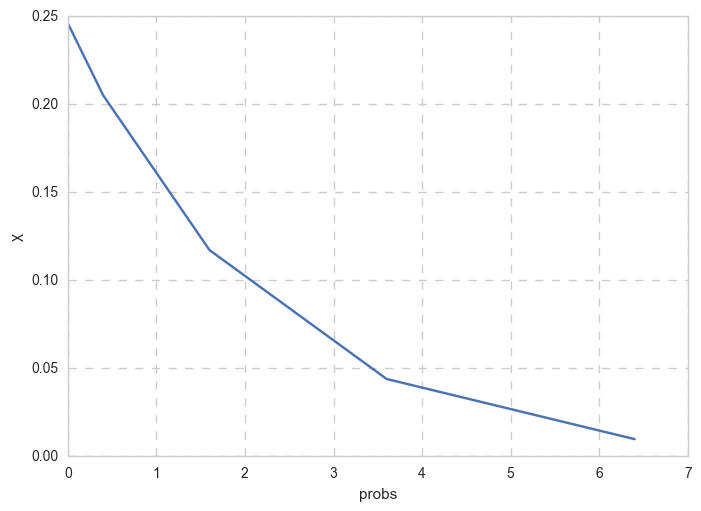

PyObject <matplotlib.text.Text object at 0x32b186750>

In [46]:
plot(χs, probs)
xlabel("probs")
ylabel("χ")

期待度数

| お店/メニュ | ポテト  | チキン | 合計|
|-------------|---------|--------|-----|
| ワクワク | 420 | 180 | 600|
| もぐもぐ | 280  | 120| 400|
| 合計 | 700  | 300| 1000|

観測度数

| お店/メニュ | ポテト  | チキン | 合計|
|-------------|---------|--------|-----|
| ワクワク | 435 | 165 | 600|
| もぐもぐ | 265  | 135| 400|
| 合計 | 700  | 300| 1000|

In [60]:
observed = [435 165; 265 135]
expected = [420 180; 280 120]
χ(observed, expected)

4.464285714285714

自由度はポテトの売上げが決まるとチキンの売上が決まることから1

In [47]:
?Chisq

search: Chisq NoncentralChisq clear_history searchsortedfirst



```
Chisq(ν)
```

The *Chi squared distribution* (typically written χ²) with `ν` degrees of freedom has the probability density function

$f(x; k) = \frac{x^{k/2 - 1} e^{-x/2}}{2^{k/2} \Gamma(k/2)}, \quad x > 0.$
If `ν` is an integer, then it is the distribution of the sum of squares of `ν` independent standard [`Normal`](:func:`Normal`) variates.

```julia
Chisq(k)     # Chi-squared distribution with k degrees of freedom

params(d)    # Get the parameters, i.e. (k,)
dof(d)       # Get the degrees of freedom, i.e. k
```

External links

  * [Chi-squared distribution on Wikipedia](http://en.wikipedia.org/wiki/Chi-squared_distribution)


In [48]:
χdist = Chisq(1)

Distributions.Chisq(ν=1.0)

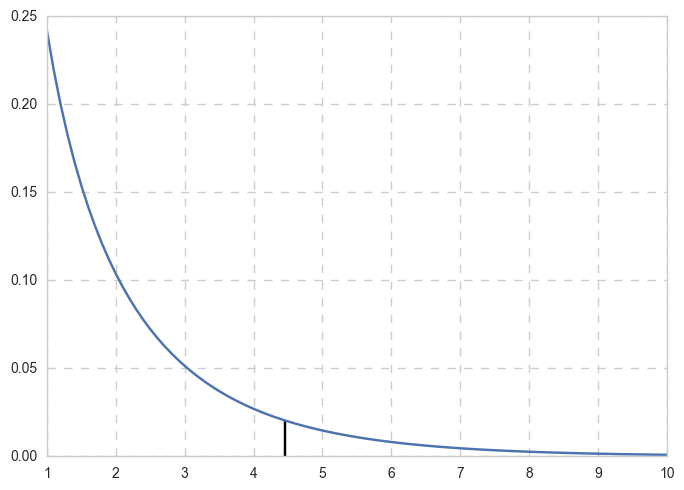

PyObject <matplotlib.collections.LineCollection object at 0x32b110a50>

In [64]:
plot(1:0.1:10, pdf(χdist, 1:0.1:10))
vlines(χ(observed, expected), 0, pdf(χdist, χ(observed, expected)))

χ(obserbed, expected)は3.84